In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Data Exploration

In [10]:
data = pd.read_csv('hand_landmarks_data.csv')
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [6]:
print(data.shape)
print(data.label.nunique())
print(data.label.value_counts())

(25675, 64)
18
label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64


In [7]:
data.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [30]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version 
from utils import *

In [12]:
print(data.shape)
X = data.drop('label', axis=1)
y = data['label']

(25675, 64)


In [31]:
new_X = preprocess_data(X.values)
print(new_X.shape)

(25675, 42)


In [32]:

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (16432, 42), Validation set: (4108, 42), Test set: (5135, 42)


In [23]:
type(new_X)

numpy.ndarray

In [18]:
y_train.iloc[1]

'two_up'

In [14]:
y_train.value_counts()

label
three2             1058
palm               1055
four               1046
ok                 1019
stop_inverted      1002
call                964
peace_inverted      958
stop                949
rock                933
three               932
peace               922
like                919
two_up_inverted     878
two_up              859
dislike             829
one                 808
mute                696
fist                605
Name: count, dtype: int64

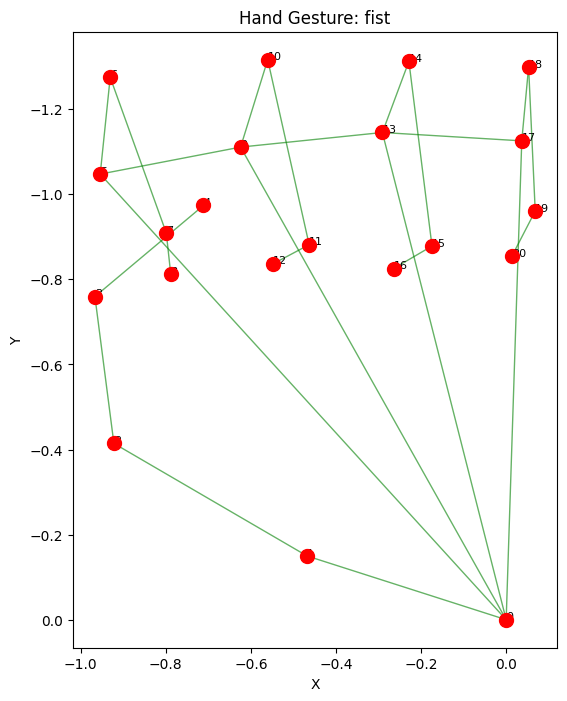

In [33]:
import importlib
import utils
importlib.reload(utils)  # Reload the utils module to ensure we have the latest version of the plot_hand_gesture function
import matplotlib.pyplot as plt
from utils import plot_hand_gesture
plot_hand_gesture(X_train, y_train, 1500)